In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [ ]:
# Loading CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Here's how you can load the CIFAR-10 dataset from a zip file:

1.  **Extract the zip file**: You'll first need to extract the contents of the zip file. You can use Python's `zipfile` module for this.
2.  **Load the data**: The CIFAR-10 dataset is typically stored in binary files. You can use `pickle` to load these files.

Here's an example of how you can do this:

In [ ]:
import zipfile
import pickle
import numpy as np
import os

# Assuming your zip file is named 'cifar-10-python.tar.gz' and is in the same directory
zip_file_path = 'cifar-10-python.tar.gz' # Replace with your zip file path
extract_path = 'cifar-10-batches-py' # Replace with your desired extraction path

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Function to load a batch of data
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load training data
x_train = []
y_train = []
for i in range(1, 6):
    batch_path = os.path.join(extract_path, f'data_batch_{i}')
    batch_data = unpickle(batch_path)
    x_train.append(batch_data[b'data'])
    y_train.append(batch_data[b'labels'])

x_train = np.concatenate(x_train).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
y_train = np.concatenate(y_train)

# Load test data
test_batch_path = os.path.join(extract_path, 'test_batch')
test_data = unpickle(test_batch_path)
x_test = test_data[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
y_test = np.array(test_data[b'labels'])

# Print shapes to verify
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

You would then replace the line `(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()` in your existing code with the code above to load the data from your zip file.

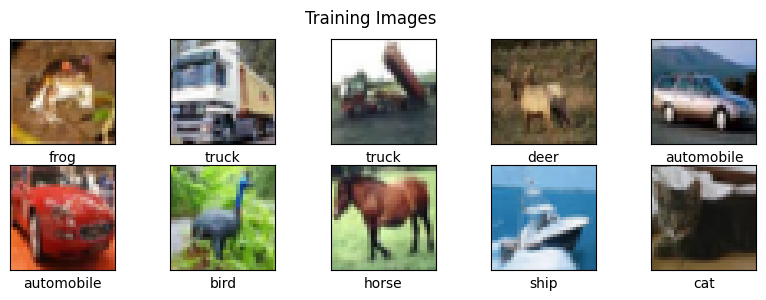

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Visualize training images
plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle('Training Images')
plt.show()

In [ ]:
#2 Defining the model's architecture

model = Sequential([
    # Input layer (specifies the shape)
    Input(shape=(32, 32, 3)),
    # First Convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same'),  #kernel_regularizer=regularizers.l2(0.001)
#if padding='valid' then there is no paddin. Each conv reduces the size
    MaxPooling2D((2, 2)),
    # Second Convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Flatten the 3D feature maps into 1D vectors
    Flatten(),

    # Fully connected (Dense) layer
    Dense(64, activation='relu'),

    # Dropout(0.3)

    # Output layer (10 classes)
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3 Training the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("\nStarting model training...")
history_cnn = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test) # We can use the test set as validation
)


Starting model training...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 116ms/step - accuracy: 0.3801 - loss: 1.6893 - val_accuracy: 0.5902 - val_loss: 1.1521
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.6146 - loss: 1.0938 - val_accuracy: 0.6522 - val_loss: 0.9794
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.6831 - loss: 0.9047 - val_accuracy: 0.6827 - val_loss: 0.9004
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7289 - loss: 0.7806 - val_accuracy: 0.7151 - val_loss: 0.8295
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.7570 - loss: 0.6992 - val_accuracy: 0.7133 - val_loss: 0.8205
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.7812 - loss: 0.6267 - val_accuracy: 0.7196 - val_loss: 0.8440
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 110ms/step - accuracy: 0.8086 - loss: 0.5532 - val_accuracy: 0.7382 - val_loss: 0.7946
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 112ms/st


Evaluating model performance...

Test accuracy: 72.9100%
Test loss: 1.2065

Plotting training history...


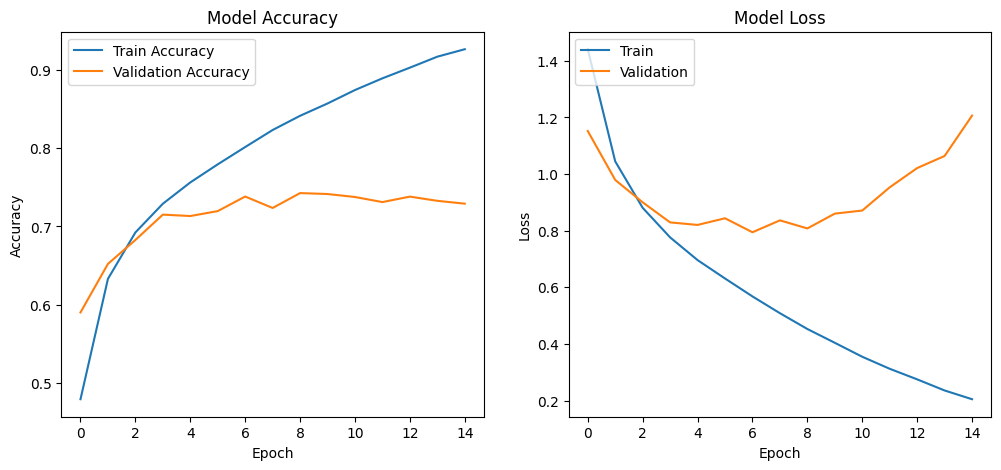

In [ ]:
# 4 Estimating the model's performance

print("\nEvaluating model performance...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc*100:.4f}%")
print(f"Test loss: {test_loss:.4f}")

# Plotting loss and accuracy
print("\nPlotting training history...")
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()